Change the runtime from CPU to GPU so that the processing power will be high

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 21 kB/s 
     |████████████████████████████████| 462 kB 48.6 MB/s 


In [ ]:
#Seeing the GPU name that has been allocated to us
!nvidia-smi

Fri Feb 18 11:01:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#connecting notebook to google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_path="/content/gdrive/MyDrive/water quality/water_potability.csv"
data=pd.read_csv(data_path)

In [ ]:
#first five rows 
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Using describe() function we can see the statistical details of the whole dataset

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
print("Shape of the dataset is : ",data.shape)
print("\n")
print("Unique values of all the columns")
print("--------------------------------")
data.nunique()

Shape of the dataset is :  (3276, 10)


Unique values of all the columns
--------------------------------


ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
#seeing the datatype of all tha attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#checking for missing values because we cannot train our statistical model with a dataset that contains missing values
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

As from the table we can see that ph,Sulfate and Trihalomethanes are the columns that contain missing avlues


---



---



TypeError: ignored

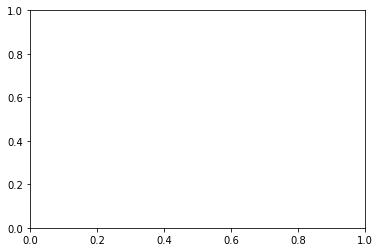

In [ ]:
sb.histplot(data.isnull())

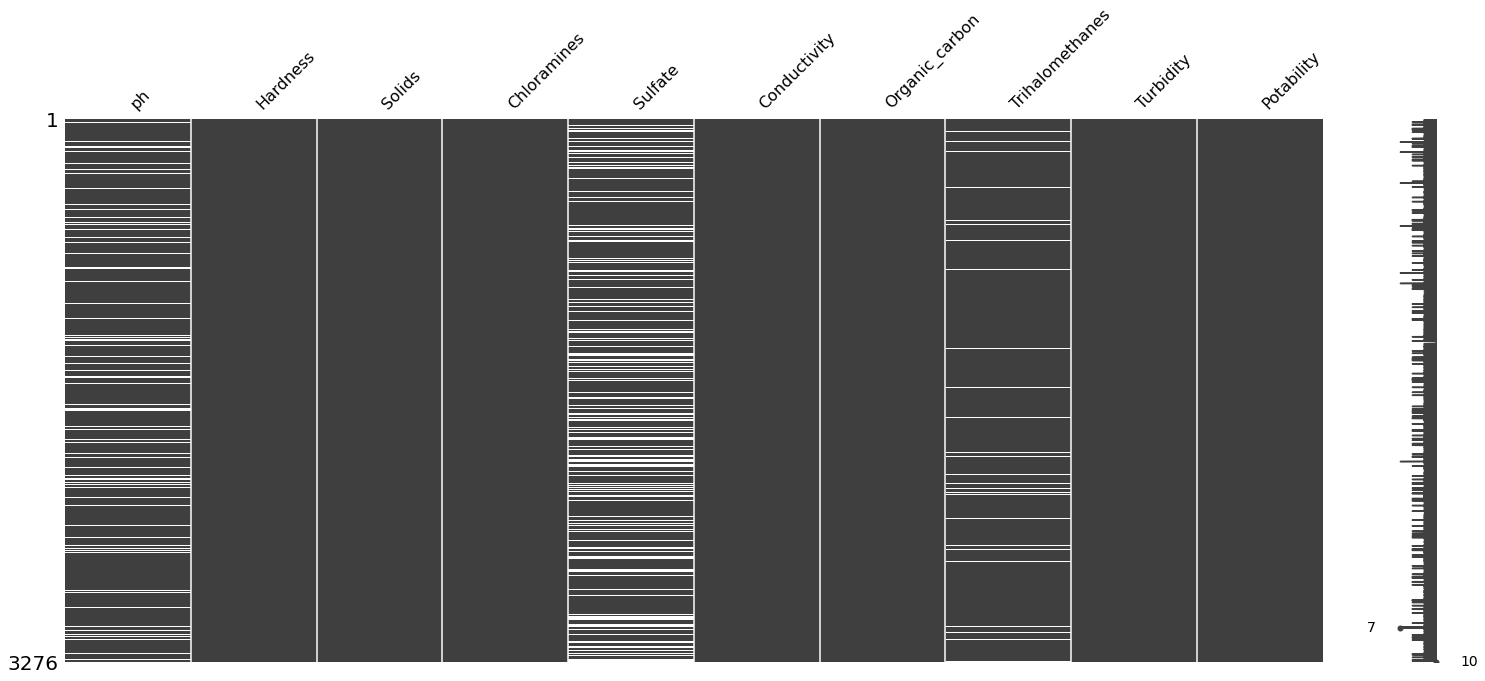

In [ ]:
import missingno as msno
msno.matrix(data); #still two columns has missing values

In [ ]:
df1=data[data['Potability']==1].copy()
df2=data[data['Potability']==0].copy()
df1['ph']=df1['ph'].replace(np.nan, df1['ph'].median())
df2['ph']=df2['ph'].replace(np.nan, df2['ph'].median())
df1['Sulfate']=df1['Sulfate'].replace(np.nan, df1['Sulfate'].median())
df2['Sulfate']=df2['Sulfate'].replace(np.nan, df2['Sulfate'].median())
df1['Trihalomethanes']=df1['Trihalomethanes'].replace(np.nan, df1['Trihalomethanes'].median())
df2['Trihalomethanes']=df2['Trihalomethanes'].replace(np.nan, df2['Trihalomethanes'].median())
data1=pd.concat([df1,df2], axis=0, ignore_index=True)
data1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Feature engineering
data1['ph'] = data1['ph'].round(decimals = 1)
def water_type(x):
    if x>8:
        y='Alkaline'
    elif x<=8 and x>7.5:
        y='Seawater'
    elif x==7.5:
        y='Tap'
    elif x< 7.5 and x>=6.5:
        y='Bottled'
    elif x<6.5 and x>=5.5:
        y='Distilled'
    else:
        y='Acidic'
    return y
data1['Type'] = data1['ph'].apply(lambda x: water_type(x))

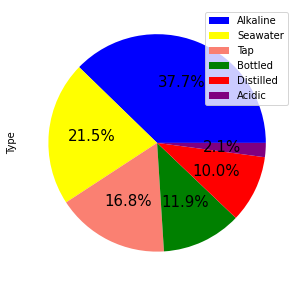

In [ ]:
plt.figure(figsize=(7,5))

data1['Type'].value_counts().plot(kind='pie',labels = ['','','','','',''], autopct='%1.1f%%', colors = ['blue','yellow','salmon','green','red','purple'],  textprops = {"fontsize":15})

plt.legend(labels=['Alkaline', 'Seawater','Tap','Bottled','Distilled','Acidic'])
plt.show()

In [ ]:
def hard_type(x):
    if x>=0 and x<17.1:
        y='Soft'
    elif x>=17.1 and x<120:
        y='Medium hard'
    elif x>=120 and x<180:
        y='Hard'
    else:
        y='Very hard'
    return y
        
data1['Hard_type'] = data1['Hardness'].apply(lambda x: hard_type(x))

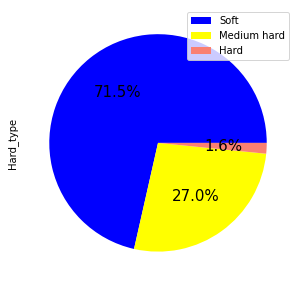

In [ ]:
plt.figure(figsize=(7,5))

data1['Hard_type'].value_counts().plot(kind='pie',labels = ['','','',''], autopct='%1.1f%%', colors = ['blue','yellow','salmon','green'],  textprops = {"fontsize":15})
plt.legend(labels=['Soft', 'Medium hard','Hard','Very hard'])
plt.show()

In [ ]:
data2 = pd.get_dummies(data1, columns = ['Type', 'Hard_type'])
data2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type_Acidic,Type_Alkaline,Type_Bottled,Type_Distilled,Type_Seawater,Type_Tap,Hard_type_Hard,Hard_type_Medium hard,Hard_type_Very hard
0,9.4,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1,0,1,0,0,0,0,1,0,0
1,9.0,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1,0,1,0,0,0,0,1,0,0
2,7.0,169.974849,23403.637304,8.519730,331.838167,475.573562,12.924107,50.861913,2.747313,1,0,0,1,0,0,0,1,0,0
3,6.8,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1,0,0,1,0,0,0,0,0,1
4,7.2,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1,0,0,1,0,0,0,0,0,1


As Potability is the target attribute that we have to predict we can drop it from the dataset

In [ ]:
X= data2.drop('Potability', axis=1)
y=data2['Potability']

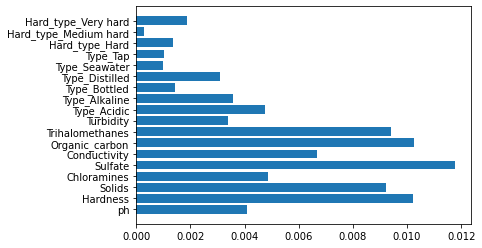

In [ ]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)  
extra_tree_forest.fit(X, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
plt.barh(X.columns, feature_importance_normalized)
plt.show()

In [ ]:
abs(data.corr()['Potability']).sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

In [ ]:
#train test split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=49)
scale=StandardScaler()
X_train1=scale.fit_transform(X_train)
X_test1=scale.transform(X_test)
y_train=y_train.values
y_test=y_test.values

In [ ]:
#creating a function for a machine learning that trains,predicts and prints the confusion matrix and accuracy
def predict(model,X_train1, X_test1, y_train, y_test):
    model.fit(X_train,y_train )
    preds=model.predict(X_test)
    print("Accuracy score")
    print("--------------")
    print(accuracy_score(y_test,preds))
    print("Confusion Matrix")
    print("----------------")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))

In [ ]:
#the model that we are going to use for prediction is Random forest
#at first we are going to find the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf=RandomForestClassifier()
rf_par = {'n_estimators':[25,50, 100], 'min_samples_leaf':[2, 5, 3]}
grid_rf = GridSearchCV(rf, param_grid=rf_par, cv=3)
grid_rf.fit(X_train1, y_train)
grid_rf.best_params_

{'min_samples_leaf': 3, 'n_estimators': 100}

In [ ]:
rf1=RandomForestClassifier(min_samples_leaf=grid_rf.best_params_['min_samples_leaf'], n_estimators=grid_rf.best_params_['n_estimators'])
predict(rf1,X_train1, X_test1, y_train, y_test) 

Accuracy score
--------------
0.7804878048780488
Confusion Matrix
----------------
[[369  60]
 [ 84 143]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       429
           1       0.70      0.63      0.67       227

    accuracy                           0.78       656
   macro avg       0.76      0.75      0.75       656
weighted avg       0.78      0.78      0.78       656

